Santiago Lopez Contreras

Roman Gonzalez Gil

## Actividad: Análisis Estadístico y Probabilístico en Minería de Datos
### Objetivo de la actividad:
El objetivo de esta actividad es que los alumnos apliquen conceptos clave de estadística (media, moda, mediana, varianza, desviación estándar) y probabilidad (Teorema de Bayes, probabilidades condicionales) en escenarios prácticos de minería de datos. A través del uso de **Pandas** y **Matplotlib**, los estudiantes desarrollarán habilidades para analizar datos, identificar patrones y tomar decisiones informadas en contextos donde la variabilidad y la incertidumbre son factores cruciales. Esta actividad fomenta el pensamiento crítico y la comprensión de cómo las herramientas estadísticas pueden integrarse en la práctica real de la minería de datos.

### Instrucciones Generales para Desarrollar la Actividad:
1. Lea detenidamente cada ejercicio: Asegúrese de comprender los conceptos estadísticos y probabilísticos que se aplican en cada caso.
2. Implemente el código en Python: Use las bibliotecas **Pandas**, y **Matplotlib** para generar datos, realizar cálculos estadísticos y graficar resultados según las indicaciones de cada ejercicio.
3. Analice los resultados: Interprete los cálculos y gráficos generados para responder a las preguntas planteadas y extraer conclusiones relevantes.
4.  Documente su trabajo: Asegúrese de incluir comentarios en su código que expliquen los pasos seguidos y las decisiones tomadas.
5. Presente sus conclusiones: Al final de la actividad, resuma sus hallazgos, destacando los conceptos aplicados en el contexto de la minería de datos.

### Ejercicio 1: Análisis de Desempeño Académico

**Objetivo**: Analizar el rendimiento académico de un grupo de estudiantes con base en sus calificaciones, identificando patrones y haciendo predicciones.

**Actividades**:
1. Calcula la media, mediana, moda, desviación estándar y varianza de las calificaciones para cada materia.  
2. Identifica la materia y semestre en la que los estudiantes tienen el desempeño más bajo (menor media), y la materia y semestre en la que tienen el mejor desempeño (mayor media).  
3. Grafica las distribuciones de calificaciones por materia, ¿Qué grafico es el más adecuado para visualizar la distribuciones de las calificaciones?.  
4. Usa el Teorema de Bayes (investiga si no lo conoces o recuerdas) para calcular la probabilidad de que un estudiante tenga un promedio general superior a 8.5, dado que su calificación en **Desafios Eticos Contemporaneos** es superior a 9.0.  

**Pregunta a contestar**:
* ¿En qué materia los estudiantes tienen un desempeño consistentemente más bajo?
* ¿Cómo podrías interpretar las diferencias en las medias de calificaciones entre las materias?
* Basado en el cálculo usando el Teorema de Bayes, ¿qué tan significativo es el impacto de una alta calificación en **Desafios Eticos Contemporaneos** en el promedio general del estudiante?

# Ejercicio 1

In [1]:
from time import process_time
import pandas as pd
file = "calificaciones_estudiantes_n.csv"
df = pd.read_csv(file)
df.info

print(df.info())

ModuleNotFoundError: No module named 'pandas'

In [2]:
#  1. Se calcula la media, mediana, moda, desviacion estandar y varianza de las calificaciones de cada materia

# Lista para nombres de materias

for m in df.columns[2:]:
    print('Materia: '+m)
    print('Mediana: '+ str(round(df[m].median(), 2)))
    print('Media: ' + str(round(df[m].mean(), 2)))
    print('Moda: ',str(df[m].mode().to_list()))
    print('Varianza: ',str(round(df[m].var(), 2)))
    print('Desviacion: ',str(round(df[m].std(), 2)))
    print('------------------------')

Materia: Comunicacion Oral y Escrita
Mediana: 8.0
Media: 7.81
Moda:  [10.0]
Varianza:  3.52
Desviacion:  1.88
------------------------
Materia: Etica, Identidad y Profesion
Mediana: 8.0
Media: 7.8
Moda:  [10.0]
Varianza:  3.53
Desviacion:  1.88
------------------------
Materia: Desafios Eticos Contemporaneos
Mediana: 8.0
Media: 7.8
Moda:  [10.0]
Varianza:  3.54
Desviacion:  1.88
------------------------


In [3]:
#  2. Identifica la materia y semestre en la que los estudiantes tienen el desempeño más bajo (menor media), y la materia y semestre en la que tienen el mejor desempeño (mayor media).

materias = df.columns[2:].values

medias = df.groupby('Semestre')[materias].mean()


min_mean = medias.min().min()
max_mean = medias.max().max()

min_idx = medias.min().idxmin()
max_idx = medias.max().idxmax()

print('Semestre y materia con menor desempeño: ' + str(round(min_mean, 2)) + ' en ' + str(min_idx))
print('Semestre y materia con mejor desempeño: ' + str(round(max_mean, 2)) + ' en ' + str(max_idx))


Semestre y materia con menor desempeño: 7.78 en Etica, Identidad y Profesion
Semestre y materia con mejor desempeño: 7.83 en Comunicacion Oral y Escrita


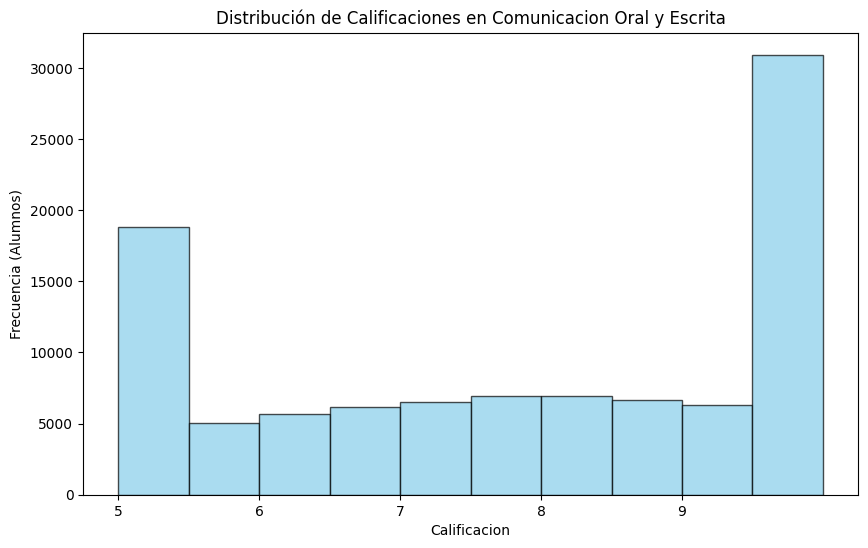

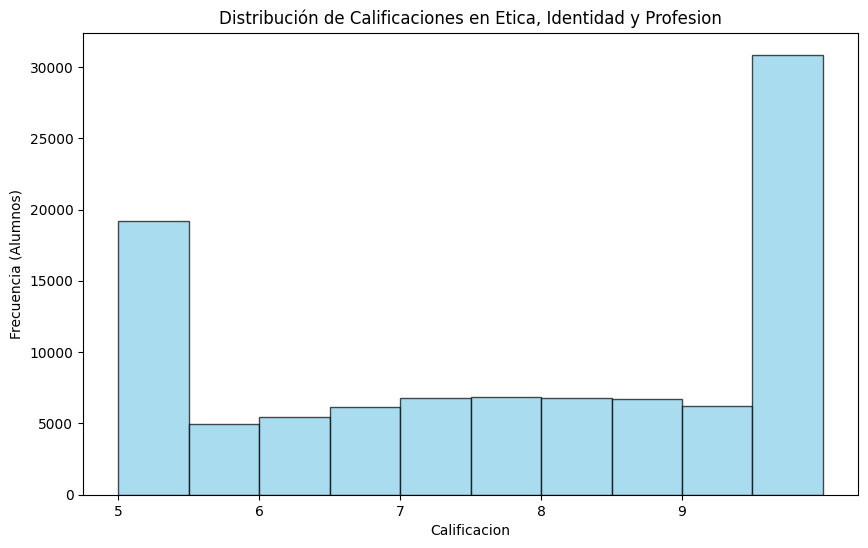

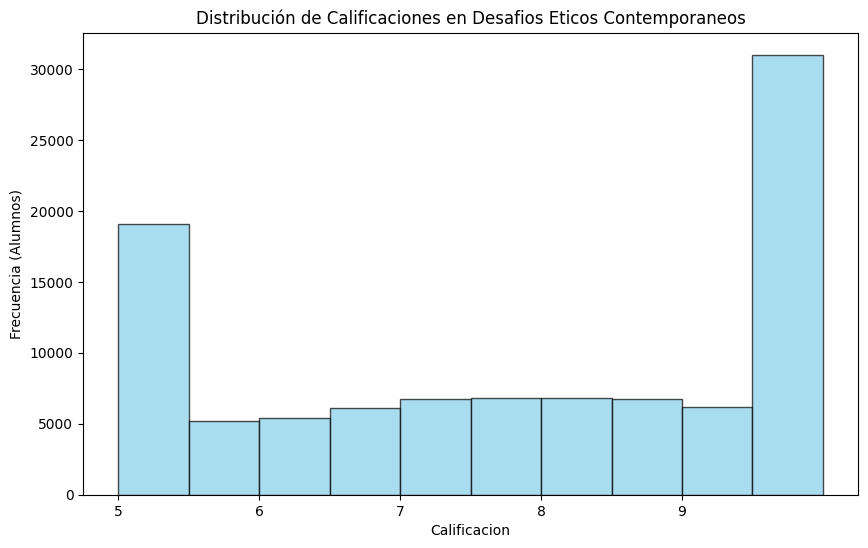

In [4]:
#  3. Grafica las distribuciones de calificaciones por materia, ¿Qué grafico es el más adecuado para visualizar la distribuciones de las calificaciones?
import matplotlib.pyplot as plt

#en un for para facilitar la impresion
for m in df.columns[2:]:
    plt.figure(figsize=(10, 6))
    plt.hist(df[m], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribución de Calificaciones en '+m)
    plt.xlabel('Calificacion')
    plt.ylabel('Frecuencia (Alumnos)')
    plt.xticks(range(5, 10))
    plt.show()


In [5]:
# 4. Usa el Teorema de Bayes (investiga si no lo conoces o recuerdas) para calcular la probabilidad de que un estudiante tenga un promedio general superior a 8.5, dado que su calificación en **Desafios Eticos Contemporaneos** es superior a 9.0.

# P(A|B) = P(B|A) * P(A) / P(B)
# Ejemplo
# P(A|B) = (1 – 0.02) * 0.001 / [(1 – 0.02) * 0.001 + 0.05 * (1 – 0.001)]
# P(A|B) = 0.019

# df['Desafios Eticos Contemporaneos']
mat = 'Desafios Eticos Contemporaneos'
# Sacamos la probabilidad de que una calificacion sea mayor a 8.5
p_85 = len(df[df[mat] > 8.5])/len(df)
print(round(p_85,2))

# Calculamos la probabilidad condicional al calcular cuántos estudiantes con promedio > 8.5 tienen calificación > 9
# es decir, cual es el porcentaje dentro del grupo de arriba de 8.5, que tiene una calificacion superior a 9
p_90_85 = len(df[(df[mat] > 8.5) & (df[mat] > 9.0)]) / len(df[df[mat] > 8.5])
print(round(p_90_85,2))

# Ahora, se calcula la probabilidad de que la calificacion > 9
p_90 = len(df[df[mat] > 9.0])/len(df)
print(round(p_90,2))
# Se aplica la ley de bayes

bachata = (p_90_85 * p_85)/ p_90

print(round(bachata,2))

0.43
0.84
0.36
1.0


**Pregunta a contestar**:
* *¿En qué materia los estudiantes tienen un desempeño consistentemente más bajo?*

Todas las materias tienen distribuciones muy parecidas, por lo que no hay una que tenga un desempeño más bajo que otro

* *¿Cómo podrías interpretar las diferencias en las medias de calificaciones entre las materias?*

No hay diferencias entre las medias de las materias

* *Basado en el cálculo usando el Teorema de Bayes, ¿qué tan significativo es el impacto de una alta calificación en **Desafios Eticos Contemporaneos** en el promedio general del estudiante?*

Es significativo, puesto que dentro de la probabilidad de que el alumno arriba de 8.5, existe un 84% que tenga una calificacion de 9.0


# Ejercicio 2
### Estudio de Demanda de Productos

**Objetivo**: Estudiar la demanda de diferentes productos en función del precio, identificando la relación entre variables e inferir la probabilidad de alta demanda con base en análisis de datos.
wswadaaawsdwdsaw    wad          bwswadaaawsdwds     bwswadaaawsdwdsaw    wad          bwswadaaawsdwdsaw    wad          bwswadaaawsdwdsaw    wad          bwswadaaawsdwdsaw    wad          bwswadaaawsdwdsaw    wad          bwswadaaawsdwdsaw    wad          bwswadaaawsdwdsaw    wad          bwswadaaawsdwdsaw    wad          baw    wad
**Actividades**:
1. Calcula las medias, desviaciones estándar, modas y medianas de precios y demanda para cada producto.
2. Grafica la relación entre precio y demanda para cada producto, ¿Qué gráfico es el más adecuado para visualizar tal relación?.
3. Usa el Teorema de Bayes para calcular la probabilidad de que un producto tenga una alta demanda ($> 50$ unidades vendidas), dado que su precio es bajo ($< promedio).


In [6]:
#Se crea el Data Frame
file = 'precios_ventas_amazon.json'
df = pd.read_json(file)
print(df)

       producto    vendedor  precio  ventas
0        Laptop  Vendedor A  524.45      33
1        Laptop  Vendedor B  234.30      33
2        Laptop  Vendedor C  331.04      38
3    Smartphone  Vendedor A  436.66      89
4    Smartphone  Vendedor B  143.16      24
5    Smartphone  Vendedor C  379.58      12
6   Auriculares  Vendedor A  432.52      48
7   Auriculares  Vendedor B  182.77      35
8   Auriculares  Vendedor C  258.86      24
9        Tablet  Vendedor A  359.10      91
10       Tablet  Vendedor B   77.23      65
11       Tablet  Vendedor C  124.17      14
12   Smartwatch  Vendedor A  107.58      18
13   Smartwatch  Vendedor B  353.38      86
14   Smartwatch  Vendedor C  187.74      11


In [7]:
grouped = df.groupby('producto')

print("**********************")
print("+++++ PRECIO +++++")
print("**********************")
print()

# Se hace lo mismo que el ejercicio anterior
for producto, datos in grouped:
    print(producto)
    precio_media = datos['precio'].mean()
    precio_desviacion = datos['precio'].std()
    precio_moda = datos['precio'].mode().tolist()[0]  # Se toma la primera moda en caso de que haya varias, como en el ejercicio anterior
    precio_mediana = datos['precio'].median()

    print("Media: " + str(round(precio_media)))
    print("Desviacion: " + str(round(precio_desviacion)))
    print("Mediana: " + str(round(precio_mediana)))
    print("Moda: " + str(precio_moda))
    print('------------------------')

print()
print("**********************")
print("+++++ DEMANDA +++++")
print("**********************")
print()

for producto, datos in grouped:
    print(producto)
    ventas_media = datos['ventas'].mean()
    ventas_desviacion = datos['ventas'].std()
    ventas_moda = datos['ventas'].mode().tolist()[0]
    ventas_mediana = datos['ventas'].median()

    print("Media: " + str(round(ventas_media,2)))
    print("Desviacion: " + str(round(ventas_desviacion)))
    print("Mediana: " + str(round(ventas_mediana)))
    print("Moda: " + str(round(ventas_moda)))
    print('------------------------')

**********************
+++++ PRECIO +++++
**********************

Auriculares
Media: 291
Desviacion: 128
Mediana: 259
Moda: 182.77
------------------------
Laptop
Media: 363
Desviacion: 148
Mediana: 331
Moda: 234.3
------------------------
Smartphone
Media: 320
Desviacion: 156
Mediana: 380
Moda: 143.16
------------------------
Smartwatch
Media: 216
Desviacion: 125
Mediana: 188
Moda: 107.58
------------------------
Tablet
Media: 187
Desviacion: 151
Mediana: 124
Moda: 77.23
------------------------

**********************
+++++ DEMANDA +++++
**********************

Auriculares
Media: 35.67
Desviacion: 12
Mediana: 35
Moda: 24
------------------------
Laptop
Media: 34.67
Desviacion: 3
Mediana: 33
Moda: 33
------------------------
Smartphone
Media: 41.67
Desviacion: 41
Mediana: 24
Moda: 12
------------------------
Smartwatch
Media: 38.33
Desviacion: 41
Mediana: 18
Moda: 11
------------------------
Tablet
Media: 56.67
Desviacion: 39
Mediana: 65
Moda: 14
------------------------


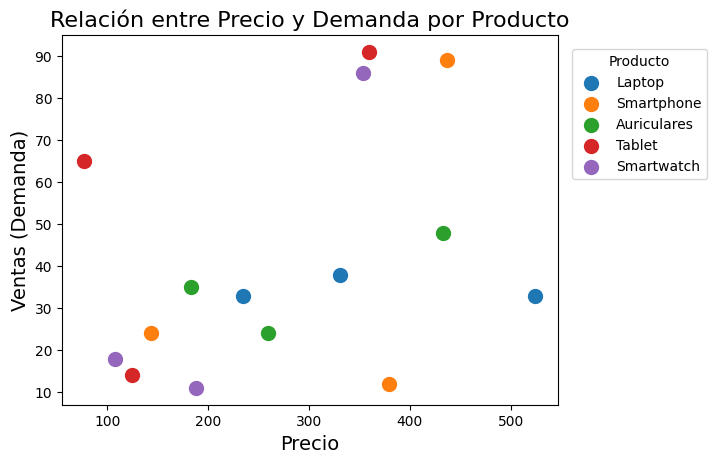

In [8]:
for producto in df['producto'].unique():
    # Filtra los datos para cada producto
    subset = df[df['producto'] == producto]
    plt.scatter(subset['precio'], subset['ventas'], label=producto, s=100)


plt.title('Relacion entre Precio y Demanda por Producto', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Ventas (Demanda)', fontsize=14)

plt.legend(title='Producto', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=1)

In [9]:
preprom = df['precio'].mean()

p_prebaj = len(df[df['precio'] < preprom]) / len(df)
print("P(Precio bajo):", round(p_prebaj, 2))

# Calcula la probabilidad de que un producto tenga alta demanda (ventas > 50)
p_altadem = len(df[df['ventas'] > 50]) / len(df)
print("P(Alta demanda):", round(p_altadem, 2))

# Calcula la probabilidad conjunta de que un producto tenga precio bajo y alta demanda
p_prebaj_altadem = len(df[(df['precio'] < preprom) & (df['ventas'] > 50)]) / len(df)
print("P(Precio bajo y Alta demanda):", round(p_prebaj_altadem, 2))

# Ley de Bayes
p_demanda_precio_bajo = p_prebaj_altadem / p_prebaj
print("P(Alta demanda | Precio bajo):", round(p_demanda_precio_bajo, 2))

P(Precio bajo): 0.53
P(Alta demanda): 0.27
P(Precio bajo y Alta demanda): 0.07
P(Alta demanda | Precio bajo): 0.12


**Preguntas a contestar**:
* ¿Qué conclusiones puedes extraer sobre la relación entre el precio y la demanda de cada producto?
No parece haber una relacion clara entre el precio y la demanda, pues precios altos y bajos ambos llegan a tener una alta demanda. El precio bajo no es un factor determinante para este tipo de demanda.


* ¿Cómo afecta la variabilidad en los precios a la probabilidad de alta demanda según el análisis realizado?
La probabilidad de que un producto tenga un precio considerado bajo es del 53%, lo que indica que poco mas de la mitad de productos tienen un precio bajo. La probabilidad de que tengan una alta demanda es del 27%, y si combinamos ambos solo es del 7%, lo que sugiere que un precio bajo no garantiza alta demanda. La variabilidad de precios sugiere que pueden existir otros factores ademas del precio que afectan la demanda.


**Conclusion**
* Retomar el teorema de bayes fue menos complicado de lo esperado y en general el primer ejercicio estuvo facil, aparte de que le avanzamos en clase. Pero si nos tardamos mas en el segundo ejercicio, generar el data frame y la media, moda, varianza, etc.. no estuvo tan complicado, pero al graficar hubo algunos atores que con un poco de talacha e investigacion se logro.